## -Legenda


- instant: Indice
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## - Ler Dataset e imformaçoes basicas

In [99]:

#Carregar dados
df=pd.read_csv("day.csv")

# Informações gerais do dataset
print("DATASET ORGINAL")
print(f"Dimensoes: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")
# Primeiras linhas do dataset
print(f"\nPrimeiras 5 linhas do dataset:")
display(df.head())

#Tipos de dados
print("\nTipos de dados:")
tipos_dados = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes.values,
    'Valores Únicos': [df[col].nunique() for col in df.columns]
})
display(tipos_dados)      




DATASET ORGINAL
Dimensoes: (731, 16)
Colunas: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Primeiras 5 linhas do dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Tipos de dados:


,Coluna,Tipo,Valores Únicos
0,instant,int64,731
1,dteday,object,731
2,season,int64,4
3,yr,int64,2
4,mnth,int64,12
5,holiday,int64,2
6,weekday,int64,7
7,workingday,int64,2
8,weathersit,int64,3
9,temp,float64,499


- Exploraçao inicial do Dataset  

features disponiveis:['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Tipos de dados:


,Coluna,Tipo,Valores Únicos
0,instant,int64,731
1,dteday,object,731
2,season,int64,4
3,yr,int64,2
4,mnth,int64,12
5,holiday,int64,2
6,weekday,int64,7
7,workingday,int64,2
8,weathersit,int64,3
9,temp,float64,499


          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

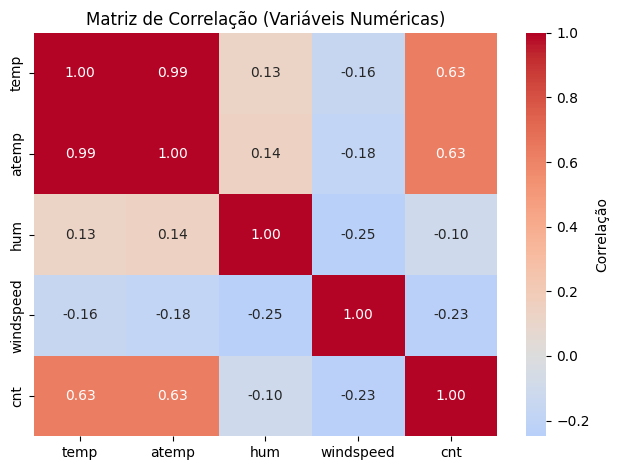

In [100]:
#features disponiveis no dataset
features =['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
print(f"features disponiveis:{features}")

#Tipos de dados
print("\nTipos de dados:")
tipos_dados = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes.values,
    'Valores Únicos': [df[col].nunique() for col in df.columns]
})
display(tipos_dados)   
print(df.describe())

#valores nulos e duplicados
print(f"Valores nulos: {df.isnull().sum().sum()}")
print(f"Linhas duplicadas: {df.duplicated().sum()}")
print(f"Total de linhas no dataset: {df.shape[0]}") 
  
# 3.4. Análise da variável alvo (cnt)
print("\nANÁLISE DA VARIÁVEL ALVO (cnt):")
print(f"Média: {df['cnt'].mean():.1f} aluguéis/dia")
print(f"Desvio padrão: {df['cnt'].std():.1f}")
print(f"Mínimo: {df['cnt'].min()}")
print(f"Máximo: {df['cnt'].max()}")
print(f"Mediana: {df['cnt'].median()}")


corr_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.tight_layout()

- New features-> Features que podem vir a ser util  

In [101]:
# Converter para datetime()
df['dteday'] = pd.to_datetime(df['dteday'])

# Fim de semana
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)  # Sábado=5, Domingo=6

# últimos 7 dias- pode vir a ser util
df.sort_values('dteday', inplace=True)
df['cnt_lag_7'] = df['cnt'].shift(7)  # Aluguéis há 7 dias



- Clean_up


In [102]:
# verificar nulos apos novas features
print(f"Valores nulos: {df.isnull().sum().sum()}")
print(f"Linhas duplicadas: {df.duplicated().sum()}")
print(f"Total de linhas no dataset: {df.shape[0]}") 

# limpar nulos
df = df.dropna()
print(f"Total de valores nulos depois da limpeza: {df.isnull().sum().sum()}")

# Remover colunas redundantes/desnecessárias
cols_to_drop = ['instant', # Nao sera utilizado por nao prestar nenhuma imformaçao necessaria
                 'atemp', # E muito correlacionado com o tem (0.99)
                 'casual',# Nao sera utilizado 
                 'registered', # Nao sera utilizado 
                 'month',
                 'year'
]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
print(f"Colunas removidas: {cols_to_drop}")
print(f"Features finais: {list(df.columns)}")

# Normalizaçao de variaveis numericas
numeric_cols = ['temp', 'hum', 'windspeed', 'cnt_lag_7']
scaler = StandardScaler() 
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(f"Normalizadas colunas: {numeric_cols}")

#One-hot encoding para variáveis categóricas
categorical_cols = ['season', 'weathersit']
df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True)
print(f"One-hot encoding aplicado a: {categorical_cols}")

print(f"\nDataset após pré-processamento: {df.shape}")
print(f"Colunas finais ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    if col =='cnt':
     print(f"{i}. {col}(target)")
    else:
       print(f"{i}. {col}")

Valores nulos: 7
Linhas duplicadas: 0
Total de linhas no dataset: 731
Total de valores nulos depois da limpeza: 0
Colunas removidas: ['instant', 'atemp', 'casual', 'registered', 'month', 'year']
Features finais: ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'is_weekend', 'cnt_lag_7']
Normalizadas colunas: ['temp', 'hum', 'windspeed', 'cnt_lag_7']
One-hot encoding aplicado a: ['season', 'weathersit']

Dataset após pré-processamento: (724, 17)
Colunas finais (17):
1. dteday
2. yr
3. mnth
4. holiday
5. weekday
6. workingday
7. temp
8. hum
9. windspeed
10. cnt(target)
11. is_weekend
12. cnt_lag_7
13. season_2
14. season_3
15. season_4
16. weathersit_2
17. weathersit_3


- Divisao de dados 

In [103]:
# Separar features (X) e target (y)
X = df.drop(columns=['cnt'])
y = df['cnt']

df['date'] = pd.to_datetime(df['dteday'])

# Divisão: treino até Set 2012, teste Out-Dez 2012
#train_cutoff = pd.Timestamp('2012-10-01')

#80% dias->treino
#20% dias->teste
train_cutoff = df['date'].iloc[int(len(df) * 0.8)] 

# Máscaras temporais
train_mask = df['date'] < train_cutoff
test_mask = df['date'] >= train_cutoff

# Dividir
X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"dias para treino:{X_train.shape[0]} dias")
print(f"dias para teste:{X_test.shape[0]} dias")
print(f"Proporção: {X_train.shape[0]/len(X):.1%} treino | {X_test.shape[0]/len(X):.1%} teste")

dias para treino:579 dias
dias para teste:145 dias
Proporção: 80.0% treino | 20.0% teste


In [104]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Salvar em CSV
train_data.to_csv('bike_train_processed.csv', index=False)
test_data.to_csv('bike_test_processed.csv', index=False)

print("Ficheiros salvos:")
print(f"bike_train_processed.csv ({train_data.shape[0]} registos)")
print(f"bike_test_processed.csv ({test_data.shape[0]} registos)")

# Salvar também os nomes das features
feature_names = list(X.columns)
with open('feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")
print(f"   • feature_names.txt ({len(feature_names)} features)")

Ficheiros salvos:
bike_train_processed.csv (579 registos)
bike_test_processed.csv (145 registos)
   • feature_names.txt (16 features)


In [105]:
print("RESUMO:")
print(f"Dataset original: {pd.read_csv('day.csv').shape}")
print(f"Dataset processado: {df.shape}")
print(f"Features finais: {X_train.shape[1]}")
print(f"Amostras totais: {X_train.shape[0] + X_test.shape[0]}")
print(f"Target: 'cnt' (aluguéis diários totais)")

RESUMO:
Dataset original: (731, 16)
Dataset processado: (724, 18)
Features finais: 16
Amostras totais: 724
Target: 'cnt' (aluguéis diários totais)


## Ramdom forest para modelo de regressao

Porque Random forest?
- lida bem com features mistas(numéricas + categóricas one-hot)
- Captura relações não-lineares
- Robusto a outliers
- bom para datasets medios/pequenos

 

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

- Carregar dados e separar features

In [107]:
train_data = pd.read_csv('bike_train_processed.csv')
test_data = pd.read_csv('bike_test_processed.csv')